In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('physopt_results.csv')
print (df.head())
df_old = pd.read_csv('physopt_results_old.csv')
print (df_old.head())

   Seed                Model Model Train Data Readout Train Data  \
0     0  SVGPretrainedFrozen         dominoes           dominoes   
1     0  SVGPretrainedFrozen         dominoes           dominoes   
2     0  SVGPretrainedFrozen         dominoes           dominoes   
3     0  SVGPretrainedFrozen         dominoes           dominoes   
4     0  SVGPretrainedFrozen             drop               drop   

  Readout Test Data  Train Accuracy  Test Accuracy Readout Type  \
0          dominoes        0.765748       0.553571            A   
1          dominoes        0.796260       0.383929            B   
2          dominoes        0.646654       0.544643            C   
3          dominoes        0.646654       0.544643            D   
4              drop        0.971910       0.609375            A   

   Sequence Length  Readout Train Positive  Readout Train Negative  \
0              150                   508.0                   482.0   
1              150                   508.0      

In [14]:
df[df['Model']=='OP3']

,Seed,Model,Model Train Data,Readout Train Data,Readout Test Data,Train Accuracy,Test Accuracy,Readout Type,Sequence Length,Readout Train Positive,Readout Train Negative,Readout Test Positive,Readout Test Negative,Description
256,0,OP3,all,rollslide,rollslide,0.929860,0.517241,A,150,NaN,NaN,NaN,NaN,NaN
257,0,OP3,all,rollslide,rollslide,0.939880,0.525862,B,150,NaN,NaN,NaN,NaN,NaN
258,0,OP3,all,rollslide,rollslide,0.937876,0.525862,C,150,NaN,NaN,NaN,NaN,NaN
259,0,OP3,all,collision,collision,0.883813,0.410000,A,150,NaN,NaN,NaN,NaN,NaN
260,0,OP3,all,collision,collision,0.885799,0.420000,B,150,NaN,NaN,NaN,NaN,NaN
261,0,OP3,all,collision,collision,0.887786,0.450000,C,150,NaN,NaN,NaN,NaN,NaN
262,0,OP3,all,drop,drop,0.894895,0.515873,A,150,NaN,NaN,NaN,NaN,NaN
263,0,OP3,all,drop,drop,0.893894,0.500000,B,150,NaN,NaN,NaN,NaN,NaN
264,0,OP3,all,drop,drop,0.892893,0.492063,C,150,NaN,NaN,NaN,NaN,NaN
265,0,OP3,all,cloth,cloth,1.000000,0.520408,A,150,NaN,NaN,NaN,NaN,NaN


<ipython-input-62-008b6a2ccd1a>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diff_df = tmp_df[df['Readout Type']=='B']['Test Accuracy'].values - tmp_df[df['Readout Type']=='C']['Test Accuracy'].values


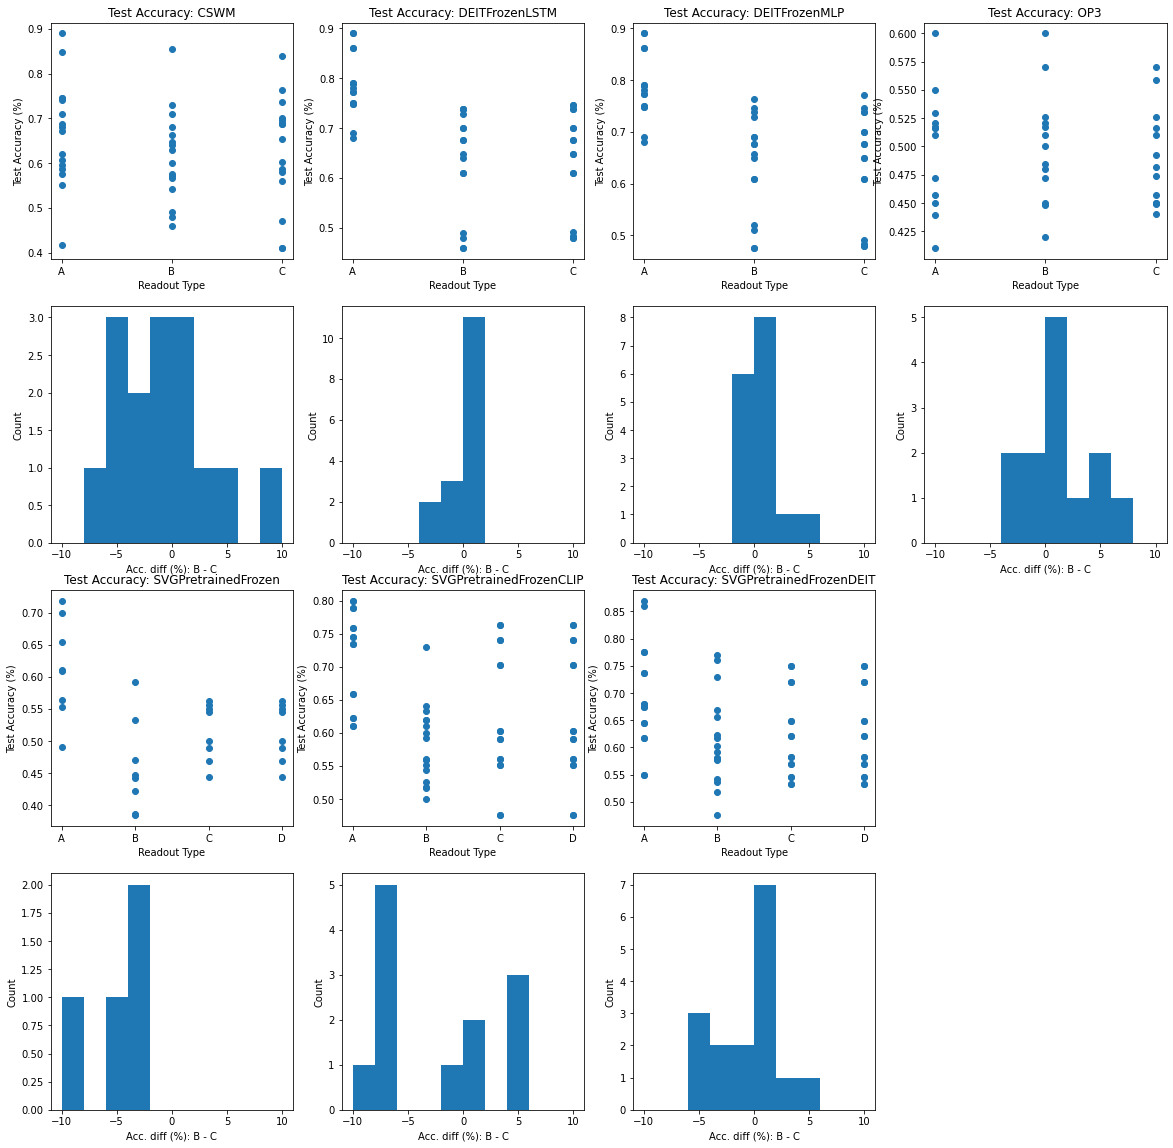

In [62]:
unique_models = np.unique(df['Model'])
plt.figure(figsize=(20,20))
for i, mdl in enumerate(unique_models):
    plt.subplot(4,4,i+1+(4*(i//4)))
    plt.title('Test Accuracy: ' + mdl)
    tmp_df = df[df['Model']==mdl]
    plt.scatter(tmp_df['Readout Type'], tmp_df['Test Accuracy'])
    plt.xlabel('Readout Type')
    plt.ylabel('Test Accuracy (%)')
    diff_df = tmp_df[df['Readout Type']=='B']['Test Accuracy'].values - tmp_df[df['Readout Type']=='C']['Test Accuracy'].values
    plt.subplot(4,4,i+5+(4*(i//4)))
    plt.hist(100*diff_df, bins=10, range=(-10, 10))
    plt.xlabel('Acc. diff (%): B - C')
    plt.ylabel('Count')

Text(0, 0.5, 'Count')

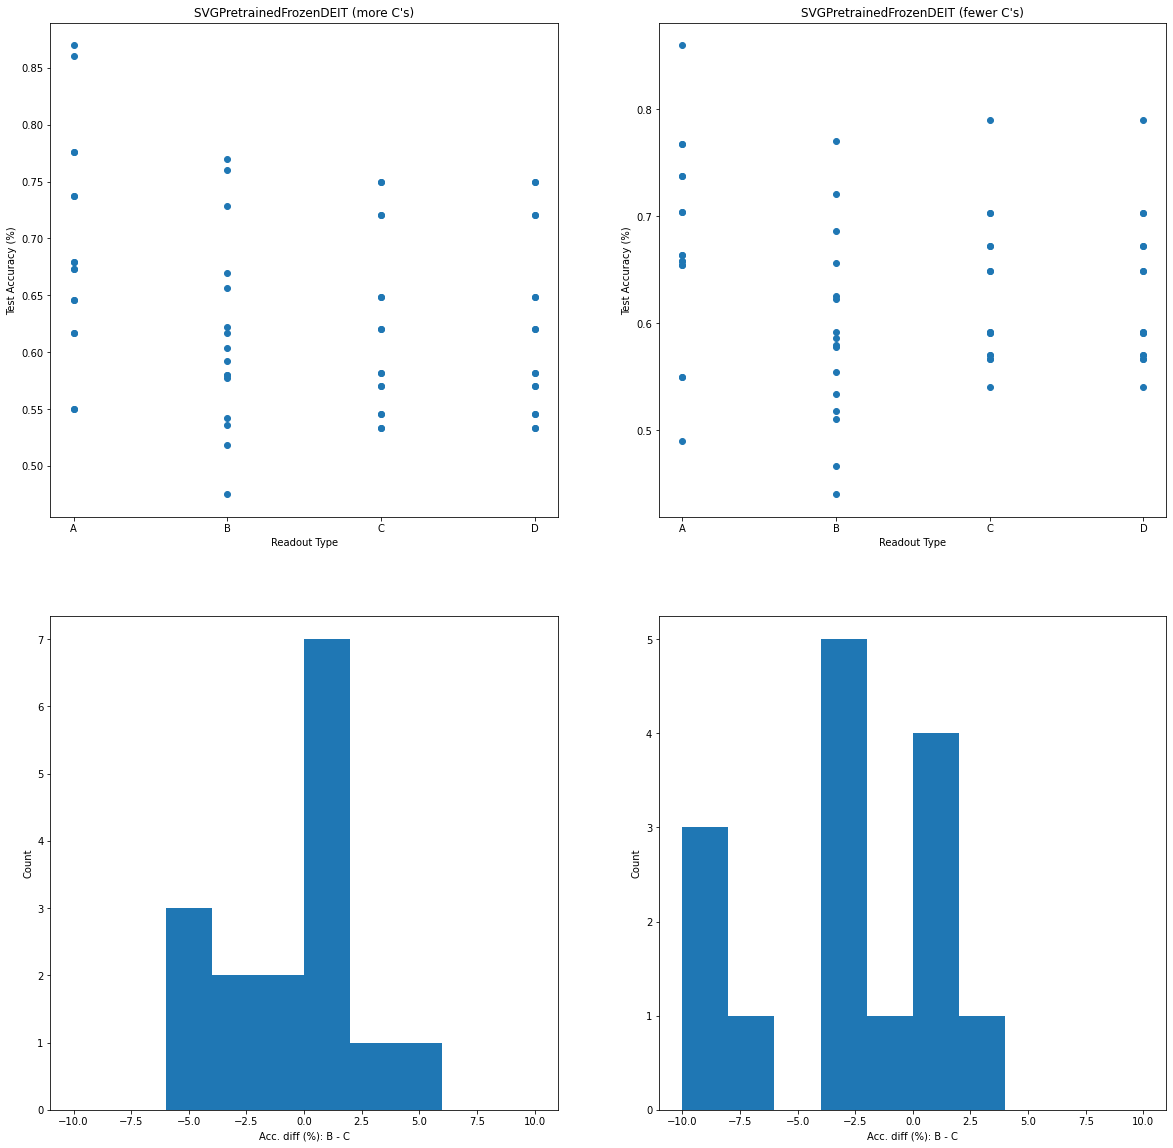

In [61]:
plt.figure(figsize=(20,20))
tmp_df = df[df['Model']=='SVGPretrainedFrozenDEIT']
plt.subplot(2,2,1)
plt.title('SVGPretrainedFrozenDEIT (more C\'s)')
plt.scatter(tmp_df['Readout Type'], tmp_df['Test Accuracy'])
plt.xlabel('Readout Type')
plt.ylabel('Test Accuracy (%)')
diff_df = tmp_df[tmp_df['Readout Type']=='B']['Test Accuracy'].values - tmp_df[tmp_df['Readout Type']=='C']['Test Accuracy'].values
plt.subplot(2,2,3)
plt.hist(100*diff_df, bins=10, range=(-10, 10))
plt.xlabel('Acc. diff (%): B - C')
plt.ylabel('Count')

tmp_df = df_old[df_old['Model']=='SVGPretrainedFrozenDEIT']
plt.subplot(2,2,2)
plt.title('SVGPretrainedFrozenDEIT (fewer C\'s)')
plt.scatter(tmp_df['Readout Type'], tmp_df['Test Accuracy'])
plt.xlabel('Readout Type')
plt.ylabel('Test Accuracy (%)')
diff_df = tmp_df[tmp_df['Readout Type']=='B']['Test Accuracy'].values - tmp_df[tmp_df['Readout Type']=='C']['Test Accuracy'].values
plt.subplot(2,2,4)
plt.hist(100*diff_df, bins=10, range=(-10, 10))
plt.xlabel('Acc. diff (%): B - C')
plt.ylabel('Count')